# Machine Learning 

**Classifier #1 and #2** --> MHW counts and occurences

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_4.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num.shape)
print(df_num.columns)


(4474, 57)
Index(['Ammonium', 'Ammonium std', 'Chlorophyll a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'Okubo-Weiss', 'Particulate Inorganic Carbon',
       'Particulate Organic Carbon', 'Phosphate max', 'Phosphate median',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich',
       'Sea Surface Temp', 'Sea ice conc', 'Sea ice free days',
       'Sea ice free end', 'Sea ice free start', 'SS Chlorophyll a',
       'SS Fluorescence', 'SS Quantum Fluorescence', 'SS Temp Grad',
       'Shannon_D_mean_all', 'Shannon_D_mean_grp', 'Shannon_D_month_all',
       'Shannon_D_month_grp', 'Shannon_P_mean', 'Shannon_P_month',
 

## Classifier #1 (number of heatwaves - 0, 1, 2+)

### Final model

In [23]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_numeric = df[numeric_cols]

# print(df_num.shape)
# print(df_num.columns)
# print(df_num['MHW_count'].value_counts())


# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_numeric['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=72)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"Input variables (X): \n{X_train.columns}")
#print(y_train)

clf_1 = DecisionTreeClassifier(random_state=43,
                                class_weight='balanced',
                                criterion='entropy',
                                max_depth=8, min_samples_split=60,
                                min_samples_leaf=40, max_features=None
                                )

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf_1, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf_1.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf_1.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the class names in the correct order
class_names = clf_1.classes_

# # Plot Decision Tree
# plt.figure()
# plt.figure(figsize=(36,15))
# plot_tree(clf, 
#           filled=True, 
#           rounded=True, 
#           feature_names=X.columns,
#           class_names=class_names, fontsize=17, precision=1,
#           impurity=True, 
#           label='all'
#           )

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/dt_count_small.png', bbox_inches='tight', dpi=200)

# plt.show()


MHW_count
0     3528
1      756
2+     190
Name: count, dtype: int64
(3131, 55) (1343, 55) (3131,) (1343,)
Input variables (X): 
Index(['Ammonium', 'Ammonium std', 'Chl a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'Okubo-Weiss', 'PIC', 'POC', 'Phosphate max', 'Phosphate med',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich', 'SST',
       'Sea ice conc', 'Sea ice free days', 'Sea ice free end',
       'Sea ice free start', 'SS Chl a', 'SS Fluorescence',
       'SS Quantum Fluorescence', 'SST Grad', 'Shannon_Darwin_mean_all',
       'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
       'Shannon_Darwin_mon

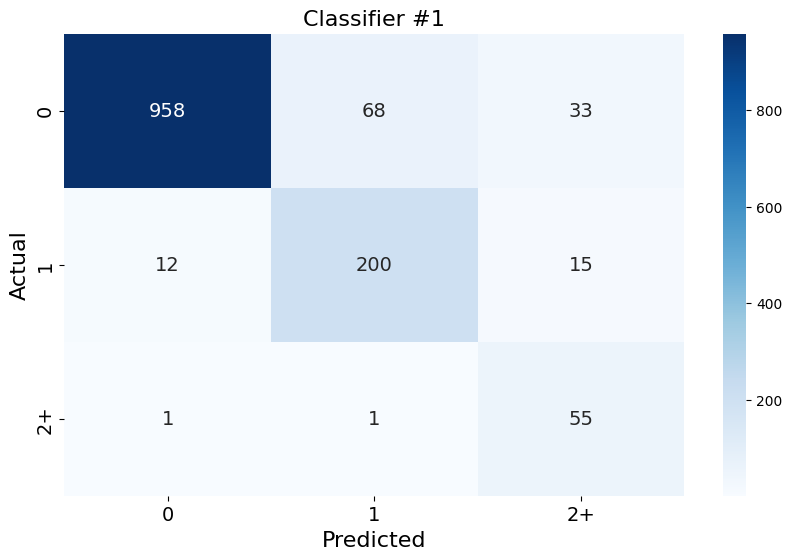

In [41]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf_1.classes_, yticklabels=clf_1.classes_,
            annot_kws={"size": 14})

plt.xlabel('Predicted', fontsize=16)  
plt.ylabel('Actual', fontsize=16) 
plt.title('Classifier #1', fontsize=16) 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/cm_classifier1.png', bbox_inches='tight', dpi=200)

plt.show()

#### Test of different `max_depth` values

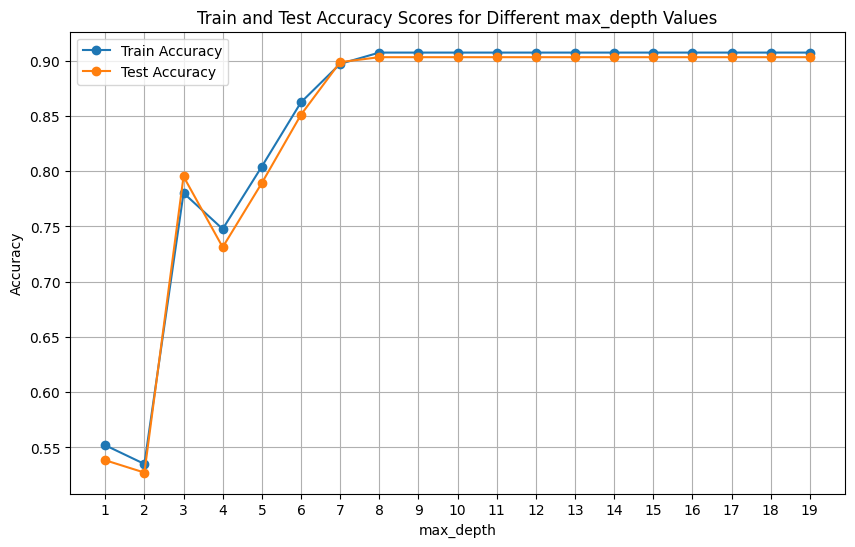

In [98]:
# Define a range of max_depth values to explore
max_depth_values = range(1, 20)

# Initialize lists to store train and test accuracy scores
train_scores = []
test_scores = []

# Iterate over different max_depth values
for max_depth in max_depth_values:
    
    # Create a Decision Tree classifier with the current max_depth
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,
                                 criterion='entropy', max_depth=max_depth,
                                 min_samples_split=55, min_samples_leaf=40,
                                 max_features=None)

    # Train the classifier on the full training data
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy scores
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot train and test accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(max_depth_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy Scores for Different max_depth Values')
plt.xticks(max_depth_values)
plt.legend()
plt.grid(True)
plt.show()


#### Test of different `min_samples_leaf` values

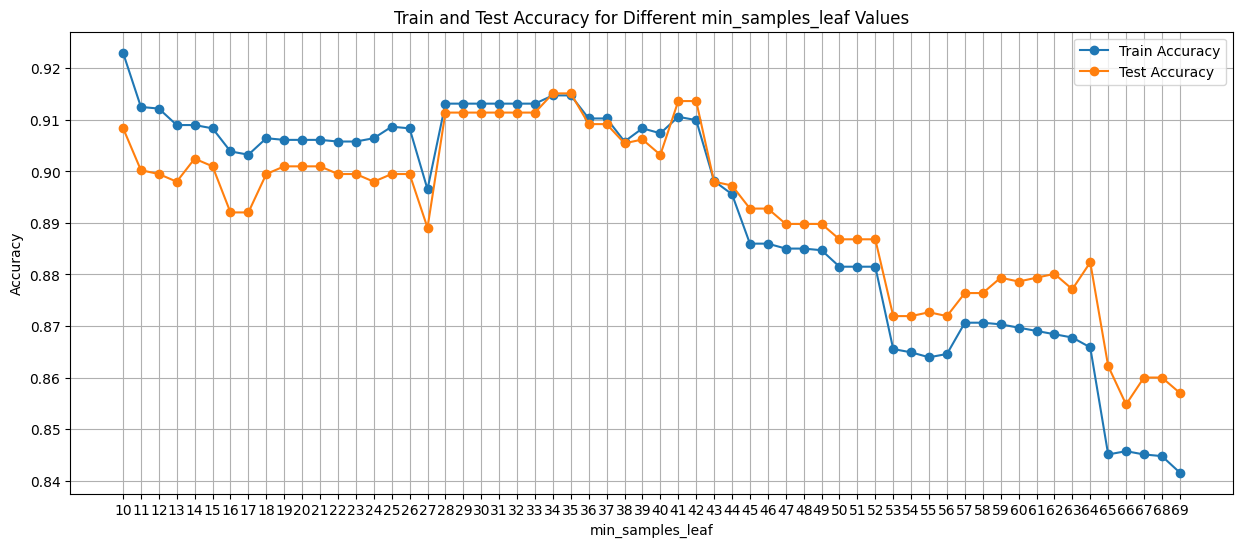

In [103]:
# Define a range of min_samples_leaf values to explore
min_samples_leaf_values = range(10, 70)

# Initialize lists to store train and test accuracy scores
train_scores = []
test_scores = []

# Iterate over different min_samples_leaf values
for min_samples_leaf in min_samples_leaf_values:

    # Create a Decision Tree classifier with the current min_samples_leaf
    clf = DecisionTreeClassifier(class_weight='balanced', random_state=42,
                                 criterion='entropy', max_depth=8,
                                 min_samples_split=55, min_samples_leaf=min_samples_leaf,
                                 max_features=None)

    # Train the classifier on the full training data
    clf.fit(X_train, y_train)

    # Calculate train and test accuracy scores
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot train and test accuracy scores
plt.figure(figsize=(15, 6))
plt.plot(min_samples_leaf_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(min_samples_leaf_values, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy for Different min_samples_leaf Values')
plt.xticks(min_samples_leaf_values)
plt.legend()
plt.grid(True)
plt.show()


### GridSearchCV - Classifier #1 (0, 1, 2+)

In [9]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num['MHW_count'].value_counts())

# Replace label values -> fewer categories
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHW_count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)

print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define the parameter grid
param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],
    'max_depth': [8, 9, 10],
    'min_samples_split': [45, 50, 55],
    'min_samples_leaf': [25, 28, 30, 35],
    'max_features': [None, 50]
}

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=72, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, verbose=1,
                           param_grid=param_grid, cv=7, n_jobs=-1,
                           scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Calculate precision, recall, and F1-score
predictions = grid_search.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
MHW_count
0     3528
1      756
2+     190
Name: count, dtype: int64
(3131, 55) (1343, 55) (3131,) (1343,)
Fitting 7 folds for each of 216 candidates, totalling 1512 fits


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_70139/605176153.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 25, 'min_samples_split': 55}
Best Accuracy: 0.9025839782221613
Precision: 0.9376176345445104
Recall: 0.9277736411020104
F1-score: 0.930822375379291


#### Results from Grid Search (Classifier #1)

In [10]:
# Extract results from grid search
results_df = pd.DataFrame(grid_search.cv_results_)

# Extract parameter names
param_names = list(param_grid.keys())

# Create separate columns for each parameter
for param_name in param_names:
    results_df[param_name] = results_df['params'].apply(lambda x: x[param_name])

# Select relevant columns
score_columns = [col for col in results_df.columns if 'mean_test_' in col]
columns_to_keep = param_names + score_columns

# Sort results by accuracy in descending order
results_df = results_df.sort_values(by=score_columns[0], ascending=False)

results_df = results_df[columns_to_keep]

print(results_df['mean_test_score'].max())

best = results_df[results_df['mean_test_score'] > 0.90]

print(best.head())

# Sort the results DataFrame by the specified columns
best = best.sort_values(by=['max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features'], ascending=[True, False, False, True])

# print(best[:15])

# Select the top row (combination with the highest values for min_samples_split and min_samples_leaf,
# and the lowest values for max_depth and max_features)
best_combination = best.iloc[0]

# print("Best combination:")
print(best_combination)


0.9025839782221613
    criterion  max_depth  min_samples_split  min_samples_leaf  max_features  \
50    entropy         10                 55                25           NaN   
170  log_loss          9                 55                25           NaN   
26    entropy          9                 55                25           NaN   
194  log_loss         10                 55                25           NaN   

     mean_test_score  
50          0.902584  
170         0.902584  
26          0.902584  
194         0.902584  
criterion            log_loss
max_depth                   9
min_samples_split          55
min_samples_leaf           25
max_features              NaN
mean_test_score      0.902584
Name: 170, dtype: object


### Try 1000 different random_state seeds (Classifier #1)

In [16]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_numeric = df[numeric_cols]

# Replace values
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_numeric['MHW_count'].replace(count_replace)

# Set the number of iterations
num_iterations = 1000

# Define list to store results from each random_state iteration
rs_results = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state seeds
    shuffled_df_num = shuffle(df_num, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
    y = shuffled_df_num['MHW_count']

    # Split data into train and test sets with different random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=i, stratify=y)

    # Define Decision Tree Classifier with desired hyperparameters
    clf_rs = DecisionTreeClassifier(random_state=i,
                                 class_weight='balanced',
                                 criterion='entropy',
                                 max_depth=8, min_samples_split=60,
                                 min_samples_leaf=40, max_features=None
                                 )

    # Train Decision Tree Classifier on full training data
    clf_rs.fit(X_train, y_train)

    # Model Evaluation on test data
    y_pred = clf_rs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf_rs.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 40
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:40]

    # Append results to the list
    rs_results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top Important Features': sorted_features
    })

# Create a DataFrame from the results
rs_results_df = pd.DataFrame(rs_results)

# Display the DataFrame
print(rs_results_df.describe())


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_70139/148402926.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


         Iteration     Accuracy    Precision       Recall     F1 Score
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     0.873246     0.912875     0.873246     0.883703
std     288.819436     0.017431     0.007433     0.017431     0.014779
min       1.000000     0.809382     0.883004     0.809382     0.827467
25%     250.750000     0.862249     0.907929     0.862249     0.874304
50%     500.500000     0.873790     0.913094     0.873790     0.884050
75%     750.250000     0.886076     0.918013     0.886076     0.894357
max    1000.000000     0.921817     0.938713     0.921817     0.925165


In [17]:
print(rs_results_df.describe())

         Iteration     Accuracy    Precision       Recall     F1 Score
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     0.873246     0.912875     0.873246     0.883703
std     288.819436     0.017431     0.007433     0.017431     0.014779
min       1.000000     0.809382     0.883004     0.809382     0.827467
25%     250.750000     0.862249     0.907929     0.862249     0.874304
50%     500.500000     0.873790     0.913094     0.873790     0.884050
75%     750.250000     0.886076     0.918013     0.886076     0.894357
max    1000.000000     0.921817     0.938713     0.921817     0.925165


#### Find most important features across all iterations (Classifier #1)

In [18]:
# Calculate the mean importance for each feature across all iterations
all_features = [feat for sublist in rs_results_df['Top Important Features'] for feat in sublist]
mean_importance = {}
for feature, importance in all_features:
    if feature not in mean_importance:
        mean_importance[feature] = 0
    mean_importance[feature] += importance

# Divide the sum by the number of iterations to get the mean importance
num_iterations = len(rs_results_df)
for feature in mean_importance:
    mean_importance[feature] /= num_iterations

print("Mean Top Important Features:")
print(mean_importance)


# Convert mean_importance dictionary to DataFrame
mean_importance_df1 = pd.DataFrame(mean_importance.items(), columns=['Feature', 'Importance'])

# Sort the DataFrame by mean importance values in descending order
mean_importance_df1 = mean_importance_df1.sort_values(by='Importance', ascending=False)

print(mean_importance_df1[:5])


Mean Top Important Features:
{'Iron': 0.2166766623899964, 'Radiation': 0.1508257616029409, 'Nitrate': 0.06620857528418178, 'TSM': 0.059193604403238294, 'SS Chl a': 0.08830441885643014, 'Chl a': 0.03235771576220552, 'Ammonium': 0.0070194635671302985, 'Nitrite': 0.03549816559602284, 'v': 0.04950959671943194, 'SST': 0.04900909208720654, 'Radiation 30': 0.014025025668681787, 'Okubo-Weiss': 0.007992587983976921, 'Nitrate std': 0.0719955840931483, 'Latitude': 0.008709450067582279, 'SST Grad': 0.009463941236190303, 'Sunshine duration': 0.008315587265803198, 'Ammonium std': 0.010311539546544487, 'Strain sub-mesoscale': 0.0023526482269903078, 'Phosphate med': 0.0015004149106976488, 'SS Quantum Fluorescence': 0.011888521155414023, 'Shannon_Physat_mean': 1.870917228183416e-05, 'Radiation 8.2': 0.002685792273280475, 'SILVA_func_diversity': 1.034793662485958e-18, 'Radiation 8.1': 0.002050462128804353, 'Depth bathy': 0.01683787682726602, 'Depth bot': 0.00033958869087012916, 'Depth top': 0.0006343976

### Function to plot Feature Importance

In [31]:

def plot_feature_importance(importance_df, title, plot_name, top_n=10, xlim=(0, 0.28)):

    # Sort the DataFrame by importance
    importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
    importance_df_sorted = importance_df_sorted.reset_index(drop=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df_sorted.iloc[:top_n],
                palette='viridis', hue='Feature', dodge=False, legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance (%)', fontsize=12)
    plt.ylabel('')
    plt.xlim(xlim)
    
    # Convert importance values to percentages and add numbers beside each bar
    for index, row in importance_df_sorted.iloc[:top_n].iterrows():
        importance_percentage = round(row['Importance'] * 100, 2)
        plt.text(row['Importance'] + 0.004, index, f"{importance_percentage}%",
                 ha='left', va='center')

    # plt.savefig(f'/Users/annaolsen/Desktop/Speciale/DS_thesis/{plot_name}.png', bbox_inches='tight', dpi=200)

    plt.show()


### Plot feature importance (Classifier #1)

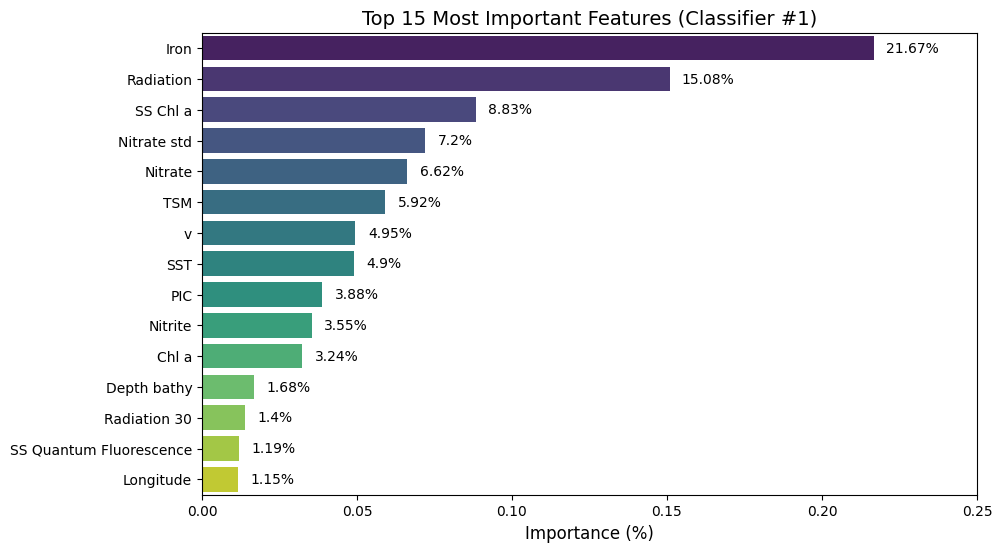

In [32]:
# Plot feature importance for 'MHWs' prediction
plot_feature_importance(mean_importance_df1.iloc[:27],
                        "Top 15 Most Important Features (Classifier #1)",
                        "feat_imp_classifier_11",
                        top_n=15, xlim=(0, 0.25))

## Classifier #2 (MHWS or not? 0 vs. 1)

MHW_count
0    3528
1     946
Name: count, dtype: int64
(3131, 55) (1343, 55) (3131,) (1343,)
Input variables (X): 
Index(['Ammonium', 'Ammonium std', 'Chl a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp', 'NPP Carbon',
       'NPP Carbon 30', 'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
       'Okubo-Weiss', 'PIC', 'POC', 'Phosphate max', 'Phosphate med',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich', 'SST',
       'Sea ice conc', 'Sea ice free days', 'Sea ice free end',
       'Sea ice free start', 'SS Chl a', 'SS Fluorescence',
       'SS Quantum Fluorescence', 'SST Grad', 'Shannon_Darwin_mean_all',
       'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
       'Shannon_Darwin_month_grp', 'Sha

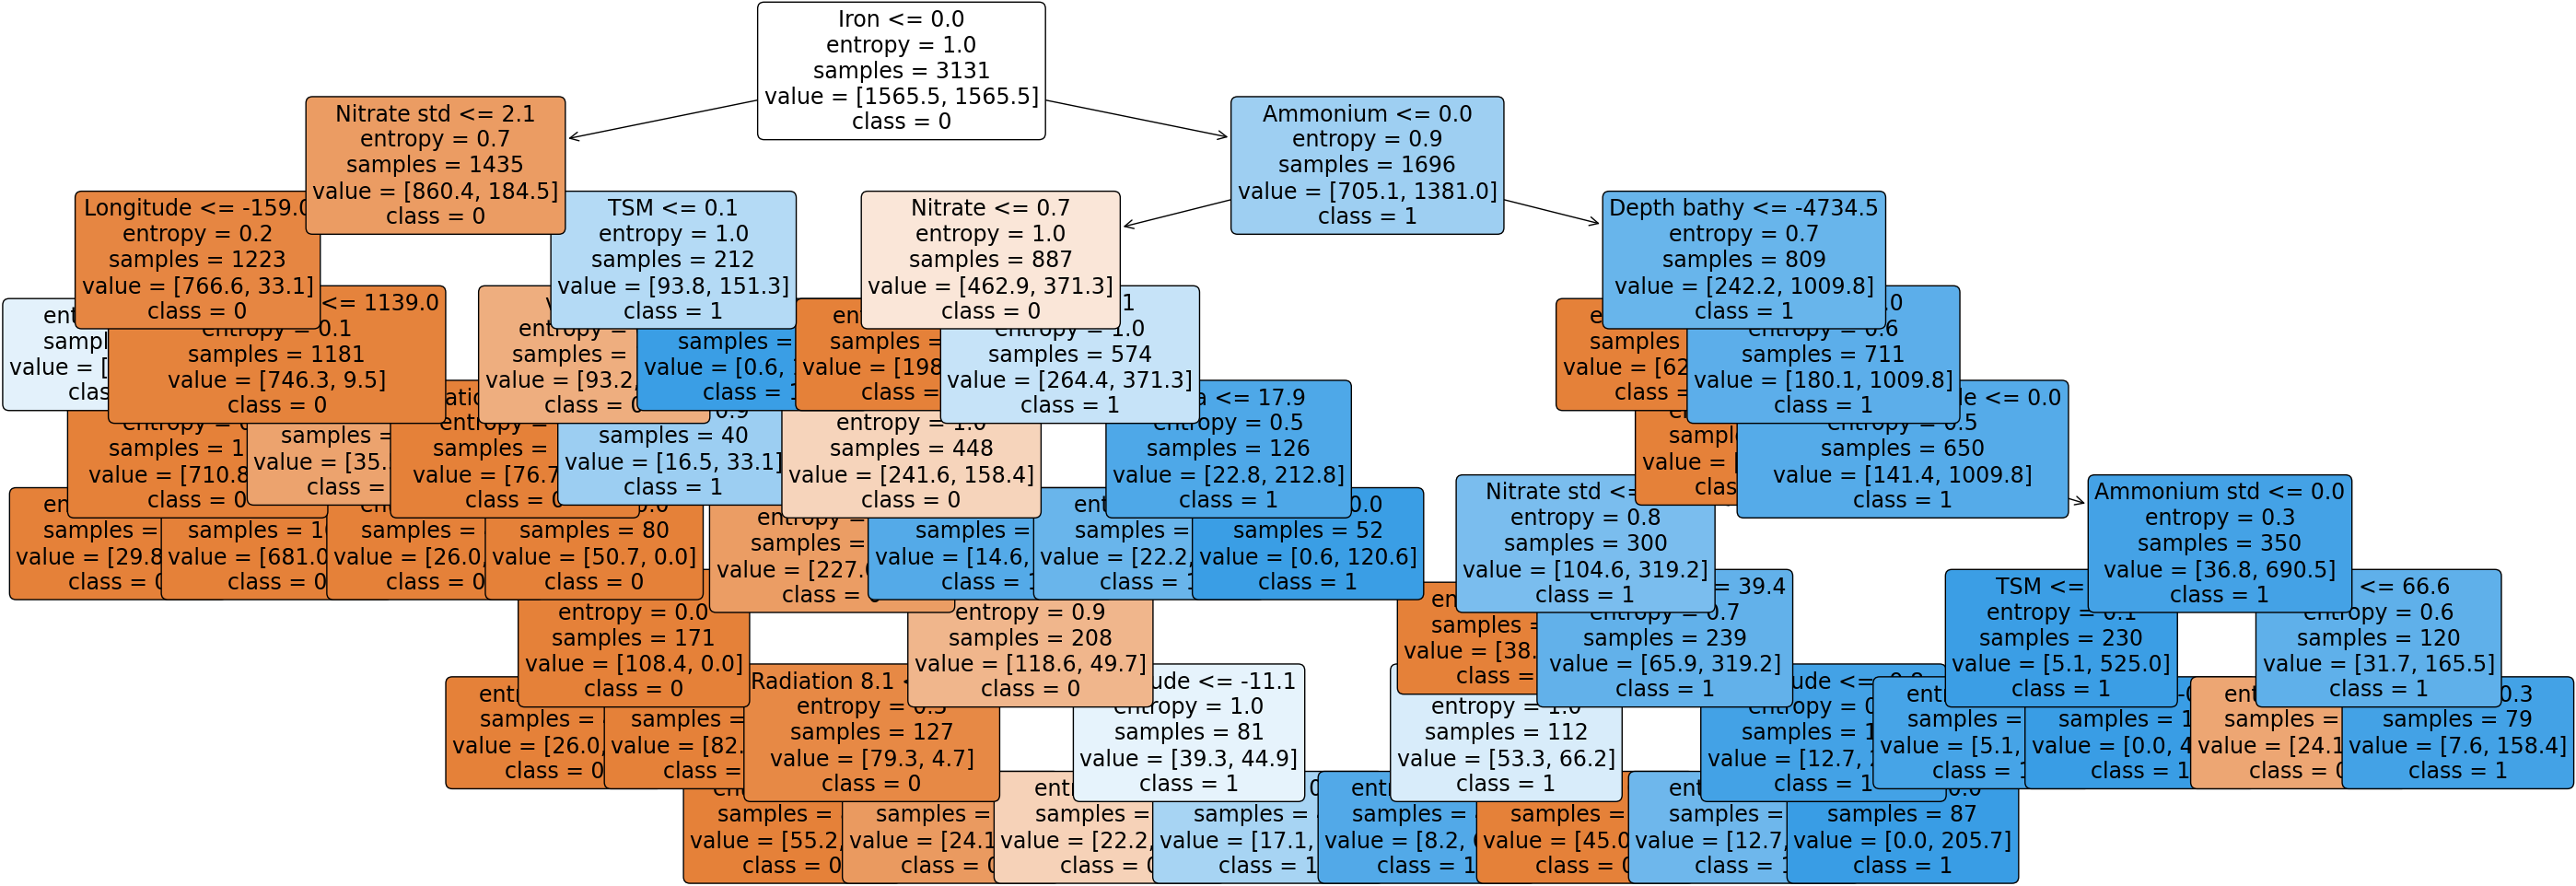

In [25]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_numeric = df[numeric_cols]


# Replace values in 'MHW_count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHW_count'
df_num['MHW_count'] = df_numeric['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=33)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
y = shuffled_df_num['MHW_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=56)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(f"Input variables (X): \n{X_train.columns}")

# Define Decision Tree Classifier
clf_2 = DecisionTreeClassifier(random_state=79, 
                             criterion='entropy',
                             class_weight='balanced',
                             max_depth=8, min_samples_split=60,
                             min_samples_leaf=40, max_features=None)


# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf_2, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf_2.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf_2.predict(X_test)
print(classification_report(y_test, y_pred))

# Get the class names in the correct order
class_names = clf_2.classes_

# Plot Decision Tree
# plt.figure()
plt.figure(figsize=(35,12))
plot_tree(clf_2, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=17, precision=1,
          impurity=True, label='all')

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/dt_binary_small.png', bbox_inches='tight', dpi=200)


plt.show()


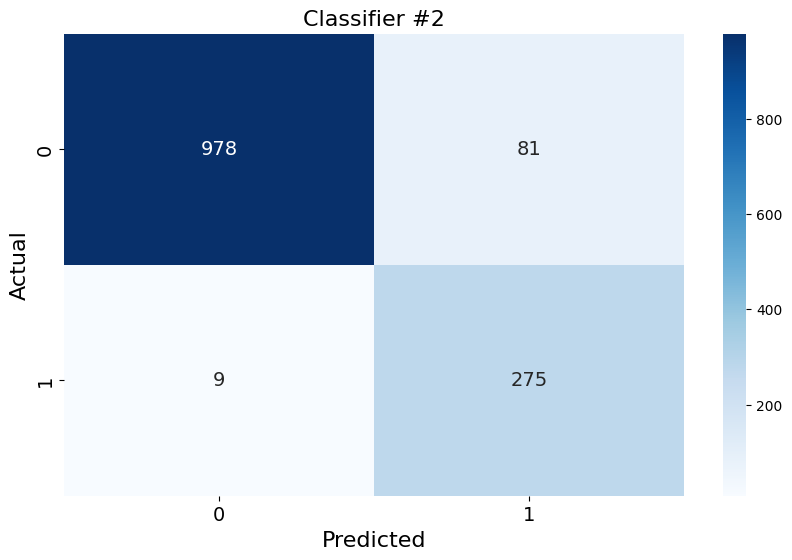

In [41]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=clf.classes_, yticklabels=clf.classes_,
            annot_kws={"size": 14}) 

plt.xlabel('Predicted', fontsize=16) 
plt.ylabel('Actual', fontsize=16) 
plt.title('Classifier #2', fontsize=16) 

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/cm_classifier2.png', bbox_inches='tight', dpi=200)

plt.show()


### Try 1000 different **random_state** seeds (Classifier #2)

In [26]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_numeric = df[numeric_cols]

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_numeric['MHW_count'].replace(count_replace)

print(df_num['MHW_count'].value_counts())

# Set the number of iterations
num_iterations = 1000

# Define lists to store results
rs_2_results = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state seeds
    shuffled_df_num = shuffle(df_num, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
    y = shuffled_df_num['MHW_count']

    # Split data into train and test sets with different random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=i, stratify=y)

    clf_rs_2 = DecisionTreeClassifier(random_state=i, 
                             criterion='entropy',
                             class_weight='balanced',
                             max_depth=8, min_samples_split=60,
                             min_samples_leaf=40, max_features=None)


    # Train Decision Tree Classifier on training data
    clf_rs_2.fit(X_train, y_train)

    # Model Evaluation on test data
    y_pred = clf_rs_2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf_rs_2.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 40
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:40]

    # Append results to the list
    rs_2_results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Top Important Features': sorted_features
    })

# Create a DataFrame from the results
results_rs_2_df = pd.DataFrame(rs_2_results)

# Display the DataFrame
print(results_rs_2_df.describe())


MHW_count
0    3528
1     946
Name: count, dtype: int64
         Iteration     Accuracy    Precision       Recall     F1 Score
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean    500.500000     0.917103     0.933581     0.917103     0.920822
std     288.819436     0.012833     0.007450     0.012833     0.011620
min       1.000000     0.823529     0.898357     0.823529     0.838077
25%     250.750000     0.908414     0.928491     0.908414     0.913153
50%     500.500000     0.918094     0.933806     0.918094     0.921394
75%     750.250000     0.926284     0.938665     0.926284     0.929054
max    1000.000000     0.950112     0.955701     0.950112     0.951350


#### Find most important features across all iterations (Classifier #2)

In [28]:

# Calculate the mean importance for each feature across all iterations
all_features = [feat for sublist in results_rs_2_df['Top Important Features'] for feat in sublist]
mean_importance = {}
for feature, importance in all_features:
    if feature not in mean_importance:
        mean_importance[feature] = 0
    mean_importance[feature] += importance

# Divide the sum by the number of iterations to get the mean importance
num_iterations = len(results_rs_2_df)
for feature in mean_importance:
    mean_importance[feature] /= num_iterations

print("Mean Top Important Features:")
# print(mean_importance)


# Convert mean_importance dictionary to DataFrame
mean_importance_df2 = pd.DataFrame(mean_importance.items(), columns=['Feature', 'Importance'])

# Sort the DataFrame by mean importance values in descending order
mean_importance_df2 = mean_importance_df2.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(mean_importance_df2[:5])


Mean Top Important Features:
       Feature  Importance
0         Iron    0.210272
1     Ammonium    0.125571
2  Nitrate std    0.108335
3      Nitrate    0.093836
4  Depth bathy    0.088924


### Plot feature importance (Classifier #2)

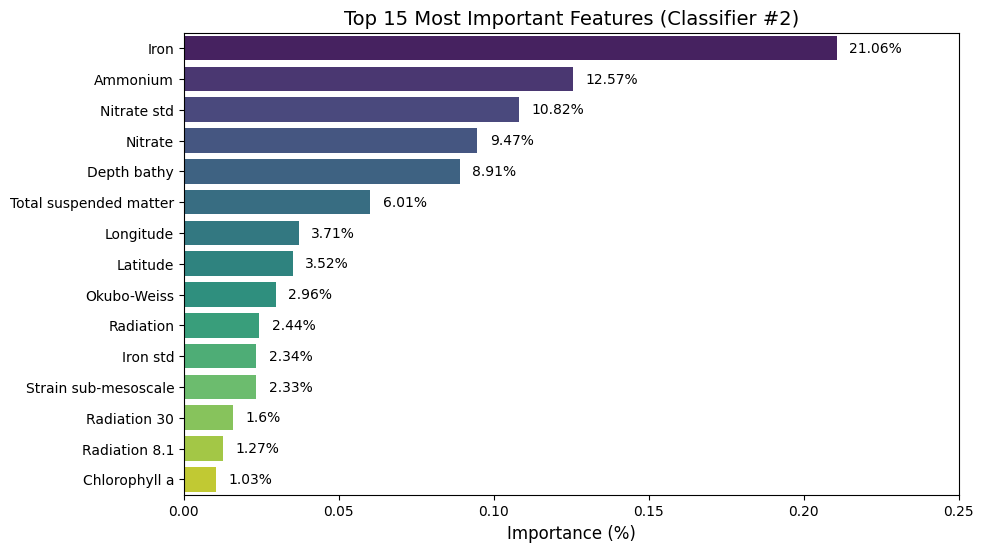

In [103]:
# Plot feature importance for 'MHWs' prediction
plot_feature_importance(mean_importance_df2.iloc[:27],
                        "Top 15 Most Important Features (Classifier #2)",
                        "feat_imp_classifier2",
                        top_n=15, xlim=(0, 0.25))


### Create correlation matrix of important features

MHW_category
0    3528
1     701
2     211
3      34
Name: count, dtype: int64
MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
       Feature  Importance
0         Iron    0.216677
1    Radiation    0.150826
2     SS Chl a    0.088304
3  Nitrate std    0.071996
4      Nitrate    0.066209


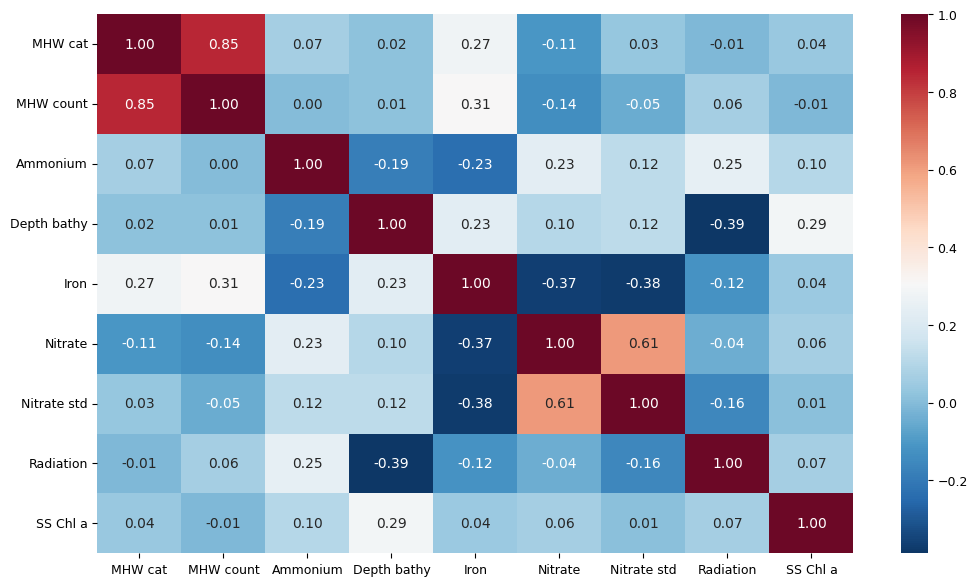

In [29]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

df['MHW_category'].fillna(0, inplace=True)

# Define the mapping of values to integers
mapping = {'Moderate': 1, 'Strong': 2, 'Severe': 3}

# Replace values in the 'category' column using the mapping
df['MHW_category'] = df['MHW_category'].replace(mapping)

# Convert the 'category' column to integer data type
df['MHW_category'] = df['MHW_category'].astype(int)

print(df['MHW_category'].value_counts())
print(df['MHW_count'].value_counts())

top_features_df1 = mean_importance_df1.sort_values(by='Importance', ascending=False).reset_index(drop=True)
top_features_df2 = mean_importance_df2.sort_values(by='Importance', ascending=False).reset_index(drop=True)


# Extract the top 15 most important features from each dataframe
# top_features_df1 = top_features_df1.head(12)
# top_features_df2 = top_features_df2.head(12)

top_features_df1 = top_features_df1.head(5)
top_features_df2 = top_features_df2.head(5)

print(top_features_df1)
# print(top_features_df2)

# Combine the features into a single list
all_top_features = list(set(top_features_df1['Feature']).union(set(top_features_df2['Feature'])))

#  Sort the features alphabetically
all_top_features.sort()

# Select 'MHW_count' and 'MHW_category' columns
columns_of_interest = ['MHW_category', 'MHW_count'] + all_top_features
selected_df = df[columns_of_interest]


# Rename the features (to better fit the plot)
selected_df = selected_df.rename(columns={'Particulate Inorganic Carbon': 'Part-Inorg-C',
                                          'Sea Surface Chlorophyll a': 'SS Chl a',
                                          'Chlorophyll a': 'Chl a',
                                          'Sea Surface Temp': 'SS Temp',
                                          'Total suspended matter': 'Tot-Susp-Mat',
                                          'MHW_category': 'MHW cat',
                                          'MHW_count': 'MHW count',
                                          'Strain sub-mesoscale': 'Str-Sub-Meso',
                                          })


# Create a correlation matrix using these features
correlation_matrix = selected_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 7))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", alpha=0.97,
            annot_kws={"size": 10})
plt.yticks(fontsize=9) 
plt.xticks(fontsize=9)
plt.title('')


# Get the color bar object
cbar = heatmap.collections[0].colorbar

# Set the font size of the color bar labels
cbar.ax.tick_params(labelsize=9)

# Move the color bar closer to the plot
plt.subplots_adjust(right=0.8)
cbar_ax = heatmap.figure.axes[-1]
cbar_ax.yaxis.label.set_size(9)

# plt.savefig('/Users/annaolsen/Desktop/Speciale/DS_thesis/corr_matrix_top_5.png', bbox_inches='tight', dpi=200)

plt.show()


### GridSearchCV (Classifier #2)

In [33]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/KODEN/data/TARA_mhws_Dash_3.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_numeric = df[numeric_cols]

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_numeric['MHW_count'].replace(count_replace)

print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count', 'Year'], axis=1)
y = shuffled_df_num['MHW_count']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define the parameter grid
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [8, 9, 10],
    'min_samples_split': [45, 50, 55],
    'min_samples_leaf': [25, 28, 30, 35, 40],
    'max_features': [None, 50]
}

# Create Decision Tree classifier
dt_classifier_2 = DecisionTreeClassifier(random_state=72, class_weight='balanced')

# Initialize GridSearchCV
grid_search_2 = GridSearchCV(estimator=dt_classifier_2, verbose=1,
                           param_grid=param_grid, cv=7, n_jobs=-1,
                           scoring='accuracy')

# Perform grid search
grid_search_2.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search_2.best_params_
best_accuracy = grid_search_2.best_score_

# Calculate precision, recall, and F1-score
predictions = grid_search_2.predict(X_test)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

MHW_count
0    3528
1     946
Name: count, dtype: int64
(3131, 55) (1343, 55) (3131,) (1343,)
Fitting 7 folds for each of 90 candidates, totalling 630 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 25, 'min_samples_split': 45}
Best Accuracy: 0.9386827717664247
Precision: 0.95876140243298
Recall: 0.9545793000744601
F1-score: 0.9556124255321142


In [34]:
# Extract results from grid search
results_df_2 = pd.DataFrame(grid_search_2.cv_results_)

# Extract parameter names
param_names = list(param_grid.keys())

# Create separate columns for each parameter
for param_name in param_names:
    results_df_2[param_name] = results_df_2['params'].apply(lambda x: x[param_name])

# Select relevant columns
score_columns = [col for col in results_df_2.columns if 'mean_test_' in col]
columns_to_keep = param_names + score_columns

# Sort results by accuracy in descending order
results_df_2 = results_df_2.sort_values(by=score_columns[0], ascending=False)

results_df_2 = results_df_2[columns_to_keep]

print(results_df_2['mean_test_score'].max())

best = results_df_2[results_df_2['mean_test_score'] > 0.93]

# print(best)

# Sort the results DataFrame by the specified columns
best = best.sort_values(by=['max_depth', 'min_samples_leaf', 'min_samples_split', 'max_features'], ascending=[True, False, False, True])

# print(best[:15])

# Select the top row (combination with the highest values for min_samples_split and min_samples_leaf,
# and the lowest values for max_depth and max_features)
best_combination = best.iloc[1]

# print("Best combination:")
print(best_combination)


0.9386827717664247
criterion             entropy
max_depth                   8
min_samples_split          50
min_samples_leaf           25
max_features              NaN
mean_test_score      0.934213
Name: 1, dtype: object
